# Learning credit networks with applications in financial industry

In [1]:
from igraph import *
import numpy as np

In [2]:
dic_GAZPRU = {'GAZPRU':1,'LUKOIL': 0.5054791, 'RUSAGB': 0.4169298, 'RUSSIA': 0.4133096, 'AKT': 0.3142437, 'RUSRAI': 0.2894857, 'VTB': 0.2771891, 'MBT': 0.2251381, 'SBERBANK': 0.2132872, 'ROSNEF': 0.1794645, 'GAZPRU.Gneft': 0.1718102, 'ALROSA': 0.1214424, 'BKECON': 0.1182884, 'VIP': 0.1130922, 'MDMOJC': 0.1125437, 'BOM': 0.09752941, 'CITMOS': 0.09603731, 'EVRGSA': 0.07702289 }
edge_list = [['AKT','BKECON'],['AKT','ROSNEF'],['AKT','RUSSIA'],['ALROSA','GAZPRU.Gneft'],['ALROSA','MBT'],
             ['ALROSA','SBERBANK'],['BKECON','MBT'],['CITMOS','BOM'],['CITMOS','BKECON'],['GAZPRU','LUKOIL'],
             ['GAZPRU','MBT'],['GAZPRU','RUSAGB'],['GAZPRU','VTB'],['GAZPRU.Gneft','VTB'],['VTB','MDMOJC'],
             ['RUSAGB','RUSRAI'],['RUSAGB','VTB'],['RUSRAI','CITMOS'],['RUSRAI','LUKOIL'],['RUSSIA','GAZPRU'],
             ['RUSSIA','SBERBANK'],['ROSNEF','EVRGSA',],['GAZPRU.Gneft','VIP']]

In [23]:
dic_bds_RUSSIA = {'RUSSIA':1,'GAZPRU': 0.5944465, 'GAZPRU.Gneft': 0.489555, 'SBERBANK': 0.4479298, 'AKT': 0.4182363,
                  'MBT': 0.3639387, 'ROSNEF': 0.3618035, 'VTB': 0.3430063, 'BKECON': 0.311397, 'CITMOS': 0.3046674,
                  'LUKOIL': 0.2981692, 'RUSAGB': 0.2973572, 'RSBZAO': 0.2955244, 'RUSRAI': 0.2949688, 'MDMOJC': 0.2914257,
                  'ALROSA': 0.2775398, 'VIP': 0.2545477, 'BOM': 0.2203211, 'EVRGSA': 0.2157418}
edge_list_bds = [['AKT','MDMOJC'],['ALROSA','EVRGSA'],['ALROSA','VTB'],['BKECON','ROSNEF'],['BKECON','VTB'],
                 ['BOM','MDMOJC'],['BOM','VIP'],['CITMOS','ALROSA'],['CITMOS','GAZPRU.Gneft'],['GAZPRU','AKT'],
                 ['GAZPRU','BKECON'],['GAZPRU','LUKOIL'],['GAZPRU','RUSSIA'],['GAZPRU','SBERBANK'],['GAZPRU.Gneft','AKT'],
                 ['GAZPRU.Gneft','MBT'],['GAZPRU.Gneft','RUSSIA'],['MBT','RUSAGB'],['MDMOJC','ROSNEF'],['MDMOJC','VIP'],
                 ['ROSNEF','RUSAGB'],['RSBZAO','VIP'],['SBERBANK','CITMOS'],['SBERBANK','GAZPRU.Gneft'],['SBERBANK','MBT'],
                 ['SBERBANK','MDMOJC'],['SBERBANK','RUSRAI'],['VIP','EVRGSA'],['VIP','LUKOIL'],['VTB','ROSNEF'],['VTB','RSBZAO']]

In [34]:
edge_list_k2 = [['AKT','ROSNEF'],['ALROSA','AKT'],['ALROSA','EVRGSA'],['ALROSA','RUSSIA'],['ALROSA','VTB'],['BKECON','BOM'],
                ['BKECON','ROSNEF'],['BKECON','RSBZAO'],['BKECON','VTB'],['CITMOS','ALROSA'],['CITMOS','LUKOIL'],
                ['EVRGSA','MBT'],['EVRGSA','RSBZAO'],['GAZPRU','AKT'],['GAZPRU','BKECON'],['GAZPRU','LUKOIL'],
                ['GAZPRU','RUSSIA'],['GAZPRU.Gneft','AKT'],['GAZPRU.Gneft','CITMOS'],['GAZPRU.Gneft','MBT'],
                ['GAZPRU.Gneft','MDMOJC'],['GAZPRU.Gneft','RUSSIA'],['GAZPRU.Gneft','SBERBANK'],['MBT','RUSAGB'],
                ['MDMOJC','AKT'],['MDMOJC','BOM'],['MDMOJC','ROSNEF'],['MDMOJC','RSBZAO'],['MDMOJC','VIP'],['ROSNEF','BOM'],
                ['ROSNEF','RUSAGB'],['RUSRAI','LUKOIL'],['RUSSIA','VTB'],['SBERBANK','CITMOS'],['SBERBANK','GAZPRU'],
                ['SBERBANK','LUKOIL'],['SBERBANK','MBT'],['SBERBANK','RUSRAI'],['SBERBANK','VIP'],['SBERBANK','VTB'],
                ['VIP','BOM'],['VIP','EVRGSA'],['VIP','LUKOIL'],['VIP','RSBZAO'],['VTB','AKT'],['VTB','BOM'],
                ['VTB','ROSNEF'],['VTB','RSBZAO'],['VTB','RUSAGB']]
dic_k2_RUSSIA = {'RUSSIA':1,'GAZPRU': 0.5817279, 'GAZPRU.Gneft': 0.4684837, 'SBERBANK': 0.4458845, 'AKT': 0.3882141,
                 'ALROSA': 0.3582323, 'VTB': 0.3267789, 'VIP': 0.3192552, 'CITMOS': 0.3147124, 'MDMOJC': 0.3088666,
                 'BKECON': 0.3085796, 'MBT': 0.3029533, 'RUSRAI': 0.2918628, 'EVRGSA': 0.2901013, 'ROSNEF': 0.2537521,
                 'RSBZAO': 0.2095662, 'RUSAGB': 0.1771609, 'LUKOIL': 0.175222, 'BOM': 0.1345806}

In [3]:
def initilise_edges(nodes,edge_list):
    edge_index_list = []
    for e in edge_list:
        first_index = nodes.index(e[0])
        second_index = nodes.index(e[1])
        edge_index_list.append((first_index,second_index))
    return(edge_index_list)

In [24]:
def generate_network(cp_dic,edge_list):
    nodes = list(sorted(cp_dic.keys()))
    edge_index_list = initilise_edges(nodes,edge_list)
    color_list = []
    for n in nodes:
        shade = str((1-cp_dic[n])*100) 
        color_list.append("rgb(100%," +shade+"%,"+ shade + "%)")
    return(edge_index_list, color_list)    

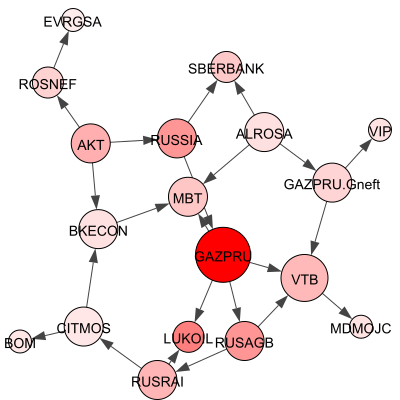

In [19]:
edge_index,color_list = generate_network(dic_GAZPRU,edge_list)
g = Graph(edge_index,directed=True)
size = [15+g*8 for g in g.degree()]
g.vs["cpty"] = list(sorted(dic_GAZPRU.keys()))
g.vs["label"] = g.vs["cpty"]
plot(g, layout = g.layout("fr"), bbox = (400, 400), margin = 20, vertex_size=size,vertex_color=color_list)

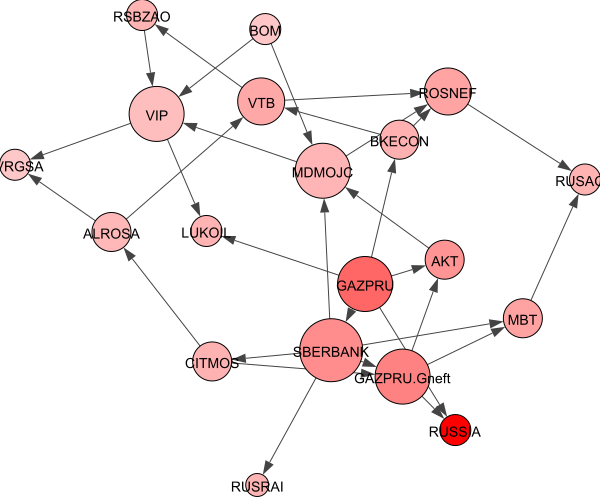

In [31]:
# BDs score
edge_index,color_list = generate_network(dic_bds_RUSSIA,edge_list_bds)
g = Graph(edge_index,directed=True)
size = [15+g*8 for g in g.degree()]
g.vs["cpty"] = list(sorted(dic_bds_RUSSIA.keys()))
g.vs["label"] = g.vs["cpty"]
plot(g, layout = g.layout("fr"), bbox = (600, 500), margin = 15, vertex_size=size,vertex_color=color_list)

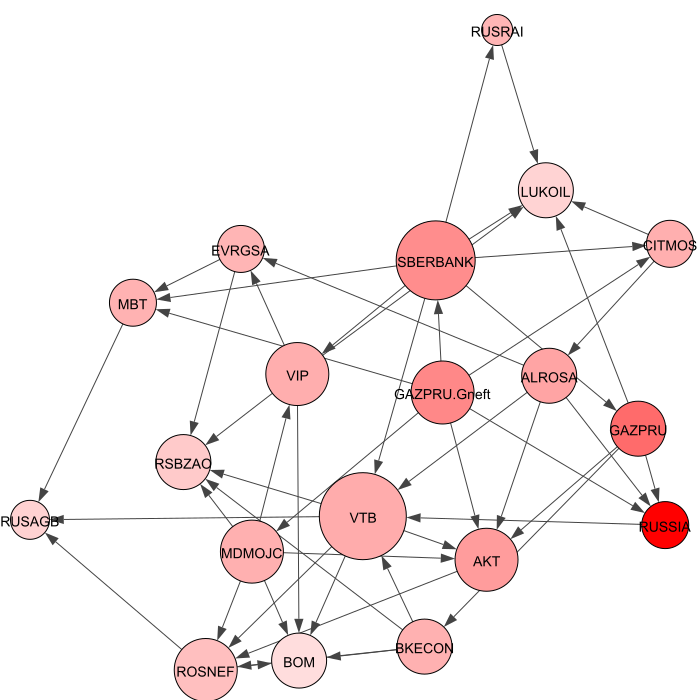

In [38]:
# k2 score
edge_index,color_list = generate_network(dic_k2_RUSSIA,edge_list_k2)
g = Graph(edge_index,directed=True)
size = [15+g*8 for g in g.degree()]
g.vs["cpty"] = list(sorted(dic_k2_RUSSIA.keys()))
g.vs["label"] = g.vs["cpty"]
plot(g, layout = g.layout("fr"), bbox = (700, 700), margin = 30, vertex_size=size,vertex_color=color_list)

In [17]:
node_list = ["AKT","ALROSA","BKECON","BOM","CITMOS","EVRGSA","GAZPRU","GAZPRU.Gneft","LUKOIL","MBT","MDMOJC","ROSNEF","RSBZAO","RUSAGB","RUSRAI","RUSSIA","SBERBANK","VIP","VTB"]
cpd = [0.384708888146627,0.136312023766175,0.357275754342278,0.156587264935736,0.359589689277553,0.0810876865930028,1,0.634061593799393,0.147187710400797,0.0766722211500934,0.17770578552972,0.273513919911646,0.140377208880834,0.346557936697911,0.583522285146415,0.545094164616304,0.386672164934854,0.0802410978584497,0.154361655175781]
dic_crisis =  dict.fromkeys(node_list)
for n,c in zip(node_list,cpd):
    dic_crisis[n]=c
print(dic_crisis)
edge_crisis = [["AKT","MDMOJC"],["ALROSA","AKT"],["ALROSA","BOM"],["ALROSA","LUKOIL"],["ALROSA","MBT"],["BKECON","ROSNEF"],["BOM","VTB"],["RUSAGB","EVRGSA"],["GAZPRU","AKT"],["GAZPRU","GAZPRU.Gneft"],["GAZPRU","RUSAGB"],["GAZPRU","RUSRAI"],["GAZPRU","RUSSIA"],["GAZPRU","SBERBANK"],["GAZPRU.Gneft","BKECON"],["GAZPRU.Gneft","CITMOS"],["GAZPRU.Gneft","RUSRAI"],["GAZPRU.Gneft","RUSSIA"],["GAZPRU.Gneft","SBERBANK"],["LUKOIL","ROSNEF"],["ROSNEF","VIP"],["ROSNEF","VTB"],["RUSRAI","ROSNEF"],["RUSSIA","RUSAGB"],["SBERBANK","CITMOS"],["SBERBANK","RUSAGB"]]


{'AKT': 0.384708888146627, 'ALROSA': 0.136312023766175, 'BKECON': 0.357275754342278, 'BOM': 0.156587264935736, 'CITMOS': 0.359589689277553, 'EVRGSA': 0.0810876865930028, 'GAZPRU': 1, 'GAZPRU.Gneft': 0.634061593799393, 'LUKOIL': 0.147187710400797, 'MBT': 0.0766722211500934, 'MDMOJC': 0.17770578552972, 'ROSNEF': 0.273513919911646, 'RSBZAO': 0.140377208880834, 'RUSAGB': 0.346557936697911, 'RUSRAI': 0.583522285146415, 'RUSSIA': 0.545094164616304, 'SBERBANK': 0.386672164934854, 'VIP': 0.0802410978584497, 'VTB': 0.154361655175781}


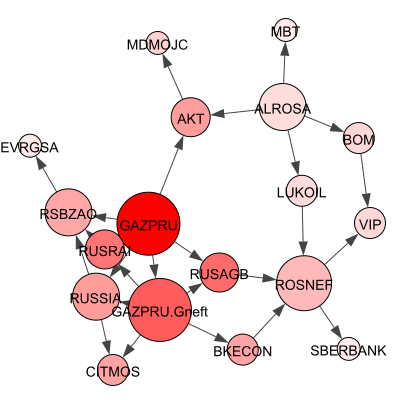

In [18]:
edge_index_crisis,color_list_crisis = generate_network(dic_crisis,edge_crisis)
g_crisis = Graph(edge_index_crisis,directed=True)
size_crisis= [15+g*8 for g in g_crisis.degree()]
g_crisis.vs["cpty"] = list(sorted(dic_crisis.keys()))
g_crisis.vs["label"] = g_crisis.vs["cpty"]
plot(g_crisis, layout = g_crisis.layout("fr"), bbox = (400, 400), margin = 30, vertex_size=size_crisis,vertex_color=color_list_crisis)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel('entities_data_fixed.xlsx')
df.head()

In [ ]:
date_list = df.columns[5:]
df_matrix=df.as_matrix(date_list)
label_list = list(df['ShortName'])
[row,column]=df_matrix.shape

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

data=[]
for i in range(row):
    trace = go.Scatter(
    x = date_list,
    y = np.asarray(df_matrix[i][:]),
    mode = 'lines',
    name = label_list[i]
    )
    data.append(trace)
# Edit the layout
layout = dict(title = 'Time series spreads for Russian CDS',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'CDS spreads in bps'),
              )

fig = dict(data=data, layout=layout)
plt_url = py.plot(fig, filename='styled-line')

In [ ]:
df_fx = pd.read_excel('entities_data_fixed.xlsx',sheetname=1)

In [ ]:
df_fx.head()
fx = list(df_fx['FX_new'])
fx = np.asarray([1/ f for f in fx])
fx_new = fx[::-1]

In [ ]:
plt.plot(fx_new)
plt.show()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

data=[]
trace1 = go.Scatter(
    x = date_list,
    y = np.asarray(df_matrix[6][:]),
    mode = 'lines',
    name = 'Gazprom CDS'
    )
trace2 = go.Scatter(
    x = date_list,
    y = fx_new,
    mode = 'lines',
    name = 'RUB/EUR FX'
    )


data = [trace1, trace2]
layout = go.Layout(
    title='Gaprom CDS vs. RUB/EUR FX rate',
    yaxis=dict(
        title='CDS spread (in bps)'
    ),
    yaxis2=dict(
        title='RUB/EUR FX rate',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cds vs fx')

In [ ]:
otc_market = pd.read_excel('derivative_market.xlsx')

In [ ]:
otc_market.head()

In [ ]:
half_years = otc_market.columns[1:]
label = list(otc_market['Derivatives risk category'])
market_val = np.transpose(otc_market.as_matrix(half_years))/1000000

In [ ]:
plt.plot(half_years,market_val)
plt.show()

In [ ]:
data=[]
[row,col] = np.shape(market_val)

for i in range(col):
    trace = go.Scatter(
    x = half_years,
    y = np.transpose(market_val)[i][:],
    mode = 'lines',
    name = label[i]
    )
    data.append(trace)
# Edit the layout
layout = dict(title = 'Gross market value of OTC derivative contracts',
              yaxis = dict(title = 'Gross maket value (in billions of USD)'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [ ]:
data=[]
[row,col] = np.shape(market_val)

for i in range(col-1):
    trace = go.Bar(
    x = half_years,
    y = np.transpose(market_val)[i][:],
    name = label[i],
    opacity = 0.8
    )
    data.append(trace)
# Edit the layout
layout = dict(title = 'Gross market value of OTC derivative contracts',
              yaxis = dict(title = 'Gross maket value (in billions of USD)'),
                barmode='stack'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')